In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("C:/Users/MSII/Downloads/Starbucks satisfactory survey.csv")
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [4]:
df.columns = ['Timestamp',
              'Gender',
              'Age',
              'Occupation',
              'Annual_Income',
              'Visit_Frequency',
              'Service_preferred',
              'Time_Spent_Frequency',
              'Nearest_Store_Distance',
              'Membership',
              'Frequent_Product',
              'Avg_Money_Spent',
              'Quality_Rating_vs_Other_Brands',
              'Price_Rating',
              'Sales_Promotion_Importance',
              'Ambiance_Rating',
              'WiFi_Rating',
              'Service_Rating',
              'Meetings_hangouts_preference',
              'Promotion_Source',
              'Loyalty'
             ]
df.head()

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


# 1. Visualizations

In [ ]:
#Customer Demographics Analysis

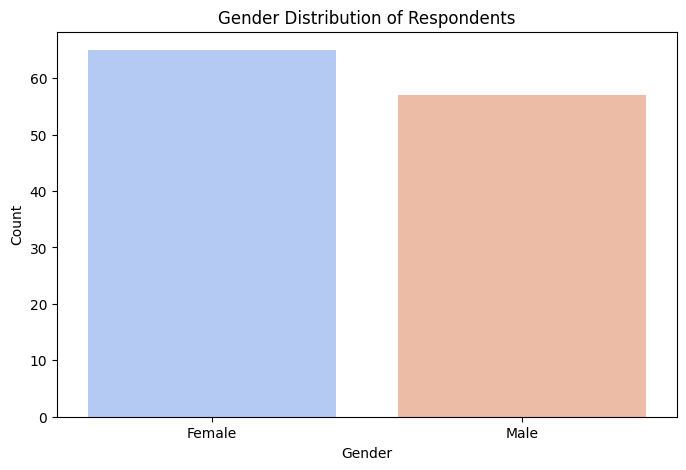

In [5]:
# 1. Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender',palette='coolwarm', hue='Gender')
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender Insights:

- The distribution shows whether Starbucks has a balanced gender representation among customers.
- If one gender dominates, targeted marketing campaigns can address the imbalance.

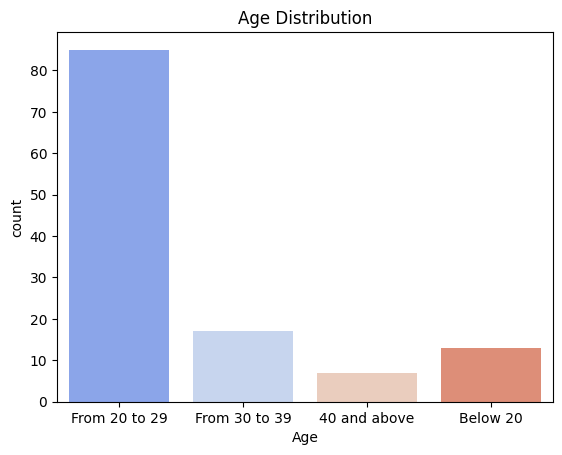

In [6]:
# Age Distribution with KDE (Kernel Density Estimate)
sns.countplot(x='Age', data=df, palette='coolwarm', hue='Age')
plt.title('Age Distribution')
plt.show()


Age Distribution:

- The histogram shows the distribution of customer ages with a KDE line to highlight the density.
- Insights: If the peak is in the 20–30 range, it indicates that most customers are young adults. The tail of the distribution may indicate some customers in older age brackets.

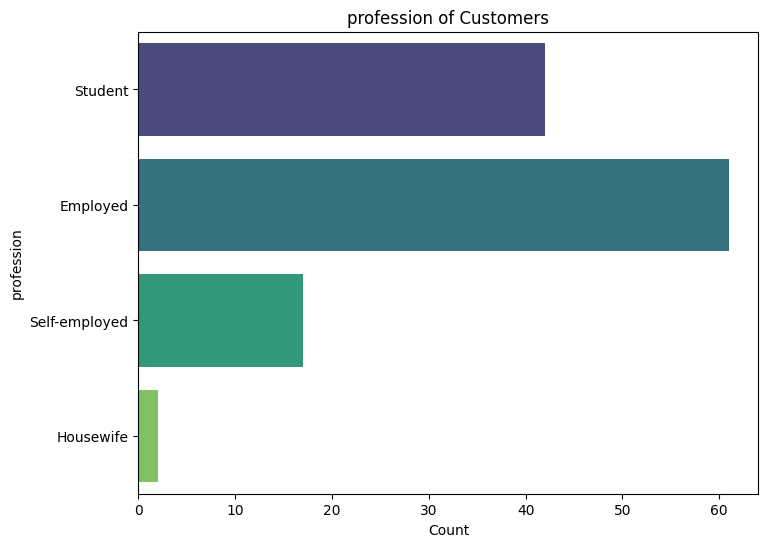

In [7]:
# Profession Distribution 
plt.figure(figsize=(8, 6))
sns.countplot(y='Occupation', data=df, palette='viridis',hue='Occupation')
plt.title('profession of Customers')
plt.xlabel('Count')
plt.ylabel('profession')
plt.show()

Occupation Analysis:

- The count plot shows how many customers belong to each occupation category.
- Insights: If “Student” or “Employed” are dominant categories, this suggests that Starbucks primarily attracts these groups. Occupation can be linked to purchasing power and preferences.

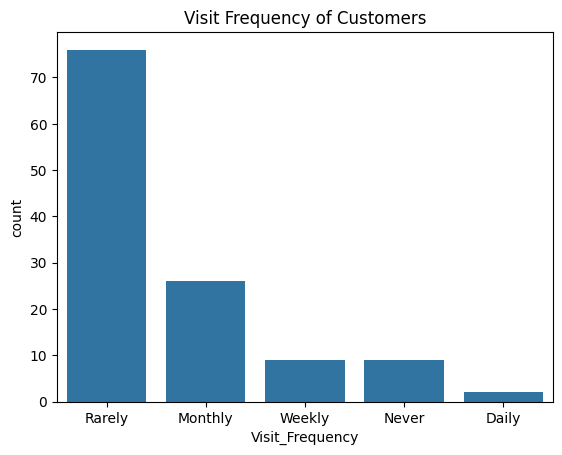

In [8]:
#Visit Frequency of Customers
sns.countplot(x='Visit_Frequency', data=df)
plt.title('Visit Frequency of Customers')
plt.show()



- Descriptive Analytics for Customer Behavior:
Frequency Distribution:

- The Visit Frequency plot shows how often customers visit Starbucks. Common categories might include "Rarely," "Monthly," "Weekly," or "Daily."
This helps identify the core customer base:
Frequent visitors indicate strong brand loyalty.
Rare visitors may need incentives (e.g., discounts, promotions) to increase their visit frequency.
Customer Engagement:

- If the majority of customers visit rarely or monthly, there could be opportunities to increase engagement. Loyalty programs, special events, or targeted promotions can be designed to encourage more frequent visits.
A strong presence of frequent visitors (e.g., weekly or daily) can indicate satisfaction, and Starbucks can build on this loyalty through rewards or exclusive offers.
Targeted Marketing:

- This data helps in segmenting the customer base and designing marketing strategies. For instance, customers who visit less frequently might respond well to email campaigns or social media ads promoting special deals.
Frequent visitors might appreciate membership benefits or exclusive offers that reinforce their brand loyalty.
Product and Service Strategy:

- Understanding the visit frequency allows Starbucks to tailor its product offerings and service improvements to frequent versus infrequent customers. For example, a new product launch might be focused on those with higher visit frequencies.
Customer Retention:

- If most customers fall into the "rarely" category, Starbucks may need to explore reasons for infrequent visits. These could range from pricing concerns to competition or lack of interest in current offerings. Addressing these issues could improve retention.

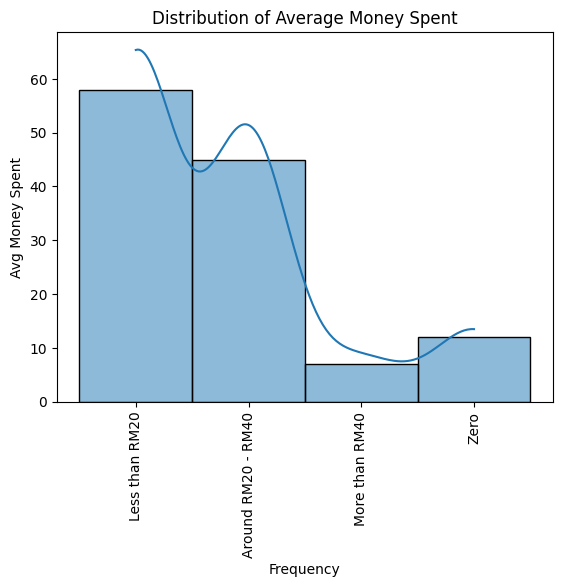

In [11]:
sns.histplot(df['Avg_Money_Spent'], kde=True)
plt.title('Distribution of Average Money Spent')
plt.xlabel('Frequency')  # Label for the x-axis
plt.ylabel('Avg Money Spent')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.show()


